In [2]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\mukes\\Downloads\\Clustering (1)\\Clustering\\EastWestAirlines.xlsx"
xls = pd.ExcelFile(file_path)

# Check sheet names and load the data
xls.sheet_names


['Description', 'data']

In [3]:
xls.parse(xls.sheet_names[0]).head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [4]:
# Load the actual data sheet
data_df = xls.parse('data')
data_df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
# Check for missing values and basic statistics
missing_values = data_df.isnull().sum()
basic_statistics = data_df.describe()

missing_values


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
 basic_statistics

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


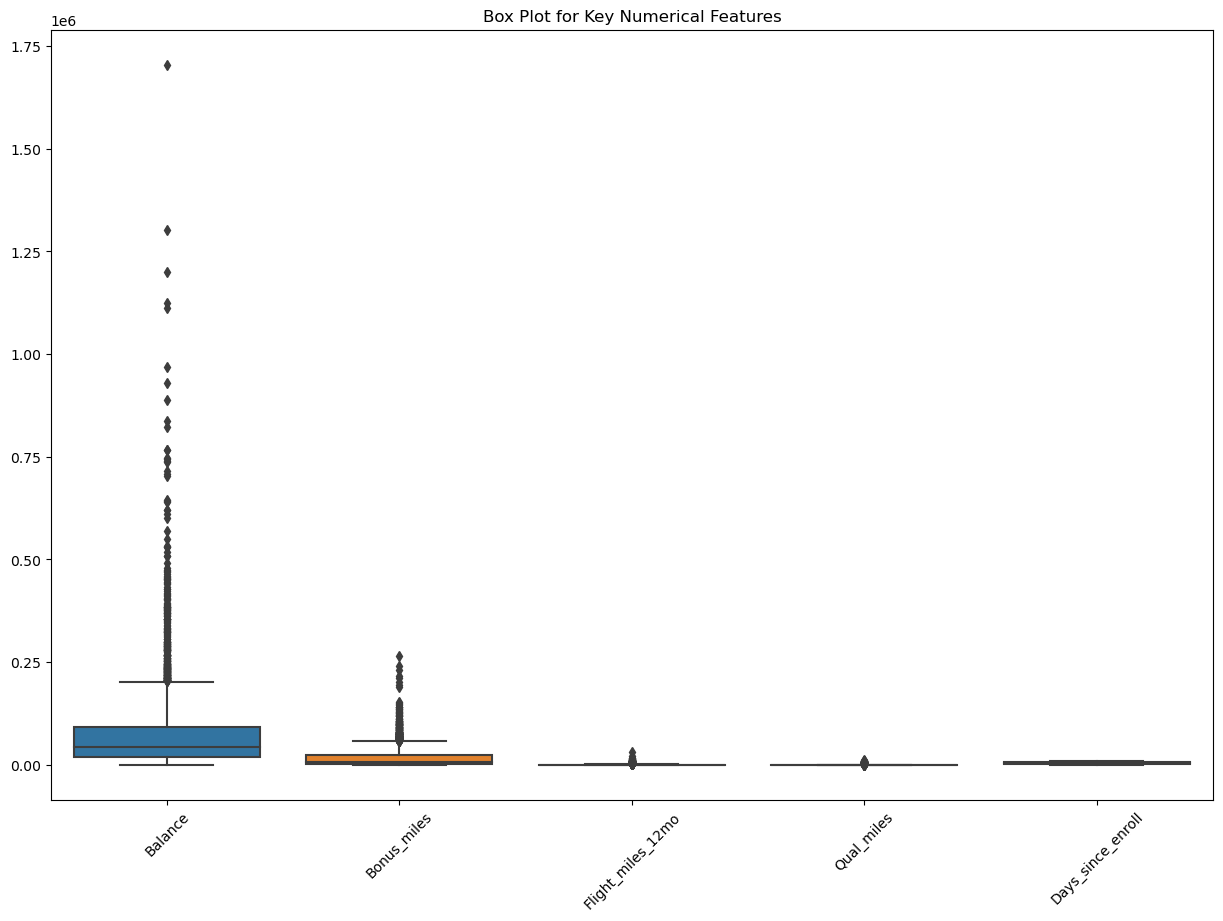

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using box plots for key variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_df[['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Qual_miles', 'Days_since_enroll']])
plt.title("Box Plot for Key Numerical Features")
plt.xticks(rotation=45)
plt.show()


# Conclusion

1. **Data Preprocessing**:
   - Handle missing values.
   - Remove outliers.
   - Scale the features if needed.
   - Perform exploratory data analysis (EDA) with visualizations to identify potential clusters.

2. **Implementing Clustering Algorithms**:
   - Implement K-Means, Hierarchical, and DBSCAN clustering algorithms using Python (e.g., scikit-learn).
   - Experiment with various parameters, such as:
     - K-Means: Use the Elbow method to determine the optimal number of clusters.
     - Hierarchical: Test different linkage criteria.
     - DBSCAN: Vary epsilon and `minPts`.
     
3. **Cluster Analysis and Interpretation**:
   - Analyze and interpret the clusters produced by each algorithm.
   - Provide insights in the form of comments.

4. **Visualization**:
   - Visualize the clusters using scatter plots or other suitable techniques.
   - Differentiate clusters with distinct colors.

5. **Evaluation and Performance Metrics**:
   - Use metrics like the silhouette score to evaluate the quality of clustering for K-Means and DBSCAN.



The Excel file contains multiple sheets: a "Description" sheet and a "data" sheet. The "Description" sheet seems to hold contextual information about the dataset, while the "data" sheet should have the actual data for analysis. 

The dataset contains the following columns:

- **ID#**: Unique identifier for each customer.
- **Balance**: Account balance.
- **Qual_miles**: Number of qualifying miles earned.
- **cc1_miles**, **cc2_miles**, **cc3_miles**: Indicators for credit card usage, possibly representing different tiers or types.
- **Bonus_miles**: Additional miles earned.
- **Bonus_trans**: Number of bonus transactions.
- **Flight_miles_12mo**: Miles flown in the last 12 months.
- **Flight_trans_12**: Number of flight transactions in the last 12 months.
- **Days_since_enroll**: Days since the customer enrolled.
- **Award?**: Whether the customer received an award (binary).


The dataset does not have any missing values, which simplifies preprocessing. Here are key points from the initial analysis:

- **Balance** and **Bonus_miles** show high variability, with their maximums significantly exceeding their means, indicating potential outliers.
- The distribution of variables like **Qual_miles**, **Flight_miles_12mo**, and **Flight_trans_12** is skewed, as seen from the large gap between their mean and max values.


